In [1]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from reader import generic_reader
import seaborn as sns
import os
import ast
os.environ["PATH"] += r";C:\Program Files\Graphviz\bin"
import graphviz

In [2]:
df_danish_actors = generic_reader.read_csv_file_to_data_frame("movie_data/danish_actors_cleaned.csv")

In [3]:
print(df_danish_actors.columns)

Index(['actor_id', 'name', 'gender', 'birthday', 'deathday', 'movie_ids',
       'age'],
      dtype='object')


In [4]:
# Dropping columns which won't be needed
columns_to_drop = ['actor_id', 'name', 'deathday', 'birthday']

df_clean_actors = df_danish_actors.drop(columns=columns_to_drop)

# Count number of movies in movie_ids
df_clean_actors['movie_count'] = df_clean_actors['movie_ids'].apply(
    lambda x: len(ast.literal_eval(x)) if isinstance(x, str) else len(x)
)

print(df_clean_actors.head())

   gender                                          movie_ids  age  movie_count
0       2  {658817, 29445, 456325, 752908, 1354636, 14460...   68           23
1       2                                            {15843}   71            1
2       2                                             {8883}   77            1
3       2                                           {266285}   77            1
4       2                                           {126250}   71            1


In [5]:
df_clean_actors.shape

(4013, 4)

In [6]:
num_rows = (df_clean_actors["movie_count"] <= 1).sum()
print(num_rows)


1480


In [7]:
df_clean_actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       4013 non-null   int64 
 1   movie_ids    4013 non-null   object
 2   age          4013 non-null   int64 
 3   movie_count  4013 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 125.5+ KB


In [8]:
array = df_clean_actors.values

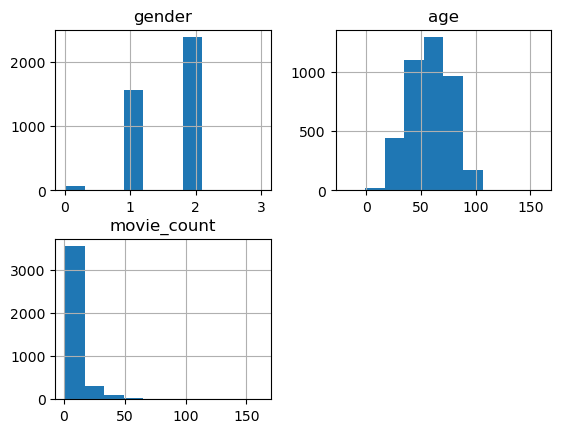

In [9]:
df_clean_actors.hist()
plt.show()

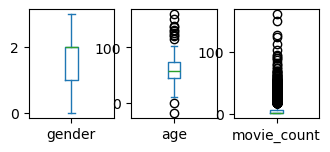

In [10]:
df_clean_actors.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
plt.show()

In [11]:
feature_cols = [
    'age',          
    'movie_count' 
]
label_col = 'gender' 

In [12]:
array = df_clean_actors[feature_cols + [label_col]].dropna().values

In [13]:
X, y = array[:, :-1], array[:, -1]

In [14]:

female = X[y == 1] 
male = X[y == 2]   

In [15]:
set_prop = 0.20

In [16]:
seed = 10

In [17]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

In [18]:
params = {'max_depth': 4}
classifier = DecisionTreeClassifier(**params)
randomclassifier = RandomForestClassifier(n_estimators = 100, max_depth = 4)

In [19]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [20]:
dot_data = tree.export_graphviz(
    classifier,
    out_file=None,
    feature_names=feature_cols,
    class_names=['Unknown', 'female', 'male', 'No-binary'],  # '' for index 0
    filled=True, rounded=True
)

In [21]:
graph = graphviz.Source(dot_data)
graph.render("danish_actor")

'danish_actor.pdf'

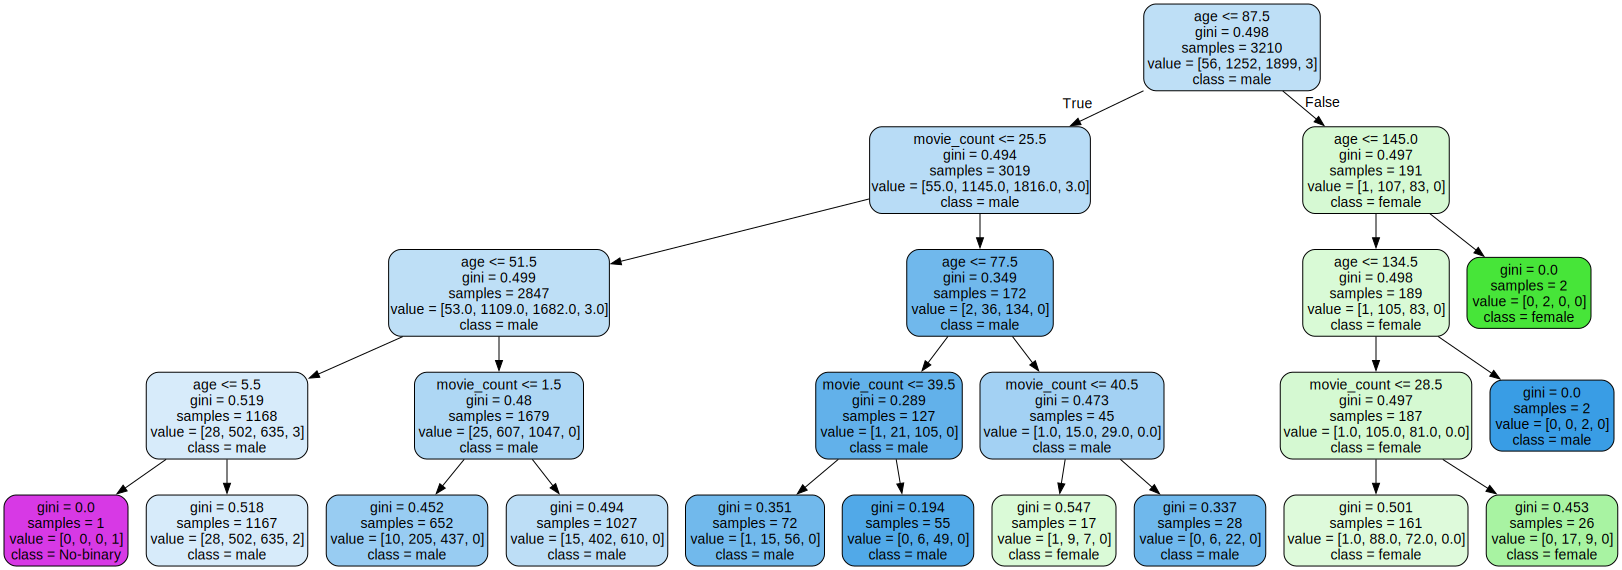

In [22]:
graph

In [23]:
scoring = 'accuracy'

In [24]:
y_testp = classifier.predict(X_test)
y_testp

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [25]:
y_test

array([2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,

In [26]:
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  0.6064757160647571


In [27]:
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat

array([[  0,   1,  10,   0],
       [  0,  20, 288,   0],
       [  0,  16, 467,   1],
       [  0,   0,   0,   0]])

In [28]:
confusion = pd.crosstab(y_test,y_testp)
confusion

col_0,1,2,3
row_0,,,
0,1,10,0
1,20,288,0
2,16,467,1


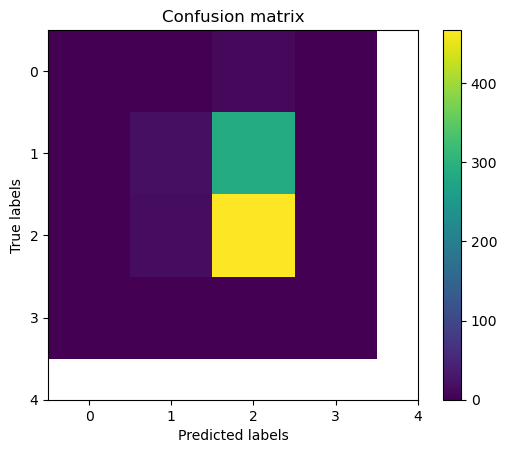

In [29]:
plt.imshow(confusion_mat, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

<Axes: >

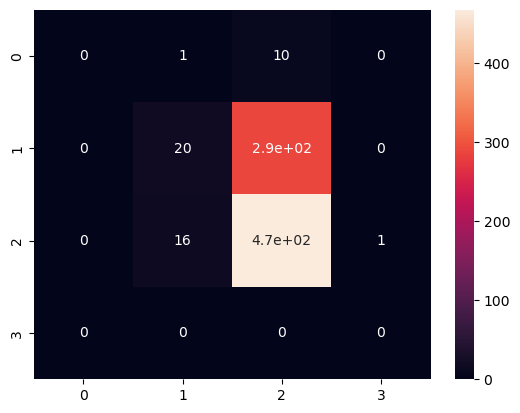

In [30]:
sns.heatmap(confusion_mat, annot=True)

In [31]:
randomclassifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [32]:
best_accuracy = 0
best_tree = None

# Loop through all trees in the random forest
for tree_estimator in randomclassifier.estimators_:
    y_pred = tree_estimator.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_accuracy:
        best_accuracy = acc
        best_tree = tree_estimator

dot_data_best = tree.export_graphviz(
    best_tree,
    out_file=None,
    feature_names=feature_cols,
    class_names=["",'female', 'male'],
    filled=True,
    rounded=True
)


IndexError: index 3 is out of bounds for axis 0 with size 3

In [ ]:
graph_best = graphviz.Source(dot_data_best)
graph_best.render("best_random_forest_tree")

'best_random_forest_tree.pdf'

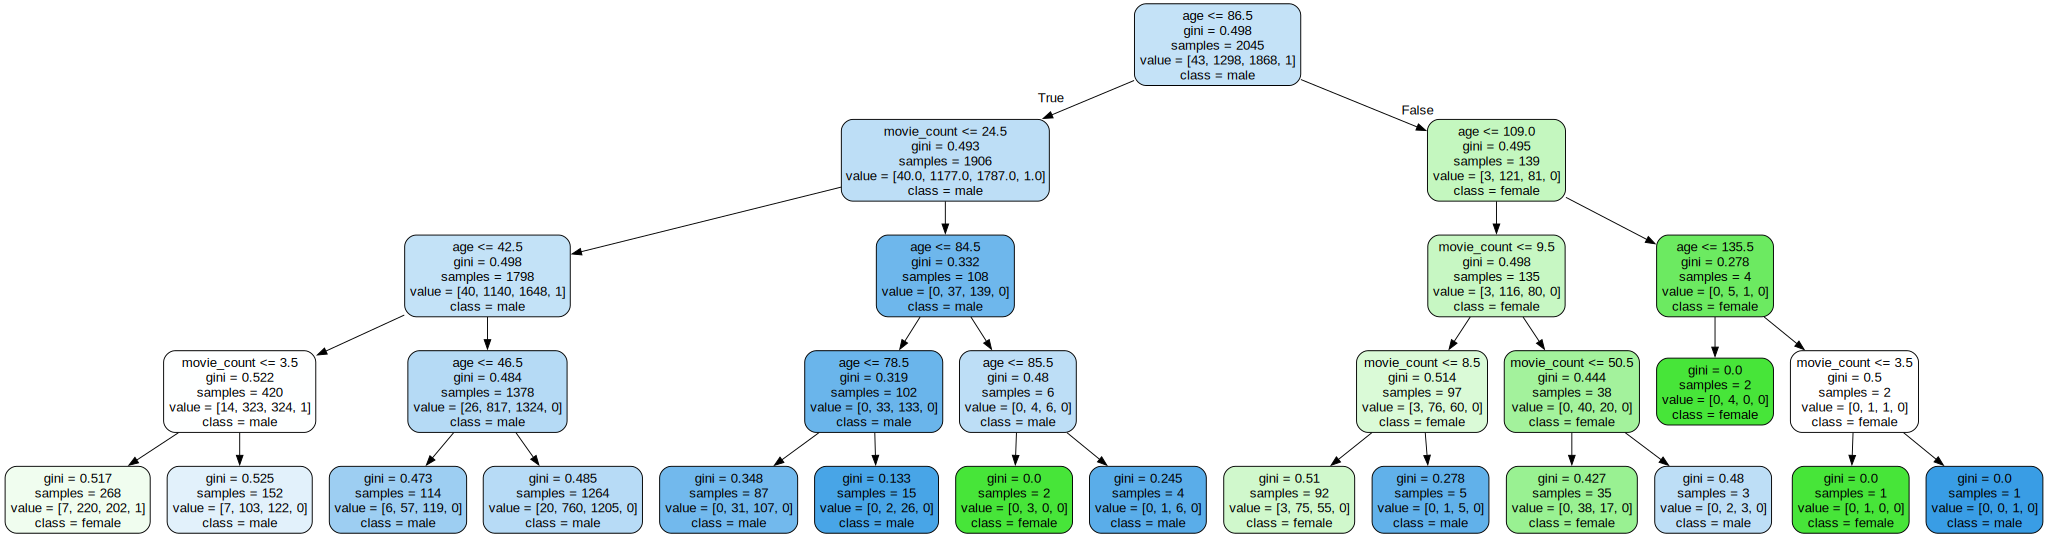

In [ ]:
graph_best

In [ ]:
scoring_random = 'accuracy'

In [ ]:
y_testp = randomclassifier.predict(X_test)
y_testp

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
y_test

array([2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,

In [ ]:
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  0.6077210460772104


In [ ]:
confusion_mat_random = confusion_matrix(y_test,y_testp)
confusion_mat_random

array([[  0,   1,  10],
       [  0,  15, 293],
       [  0,  11, 473]])

In [ ]:
confusion_random = pd.crosstab(y_test,y_testp)
confusion_random

col_0,1,2
row_0,,
0,1,10
1,15,293
2,11,473


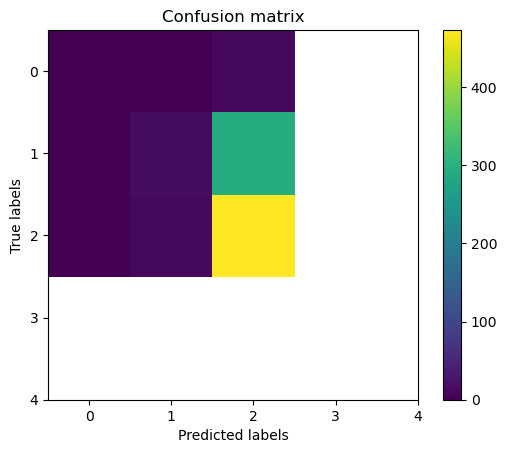

In [ ]:
plt.imshow(confusion_mat_random, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

<Axes: >

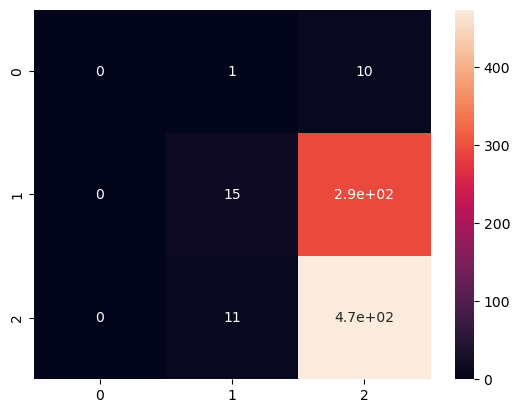

In [ ]:
sns.heatmap(confusion_mat_random, annot=True)